<a href="https://colab.research.google.com/github/mrshamshir/Automated-Neurological-Disease-Classification/blob/main/Inspect_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install celluloid

In [ ]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from celluloid import Camera
from IPython.display import HTML

### inspect labels and see if they are balanced

In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/Assignment/Diagnoses_of_training_data.csv")

In [ ]:
print(labels.shape)
labels

(40, 2)


,patient_number,diagnose
0,1,4
1,2,1
2,3,4
3,4,1
4,5,2
5,6,4
6,7,4
7,8,3
8,9,1
9,10,3


In [ ]:
labels['diagnose'].value_counts()

diagnose
4    10
1    10
2    10
3    10
Name: count, dtype: int64

### inspect train dataset, both rCBF and DAT images, their shapes, orientation and see some samples.

In [ ]:
train_rCBF = Path("/content/drive/MyDrive/Assignment/training_images_rcbf.nii")
train_DAT = Path("/content/drive/MyDrive/Assignment/training_images_sbr.nii")

In [ ]:
# Load NIfTI and extract image data
train_PET_rCBF = nib.load(train_rCBF)
train_data_rCBF = train_PET_rCBF.get_fdata()

train_PET_DAT = nib.load(train_DAT)
train_data_DAT = train_PET_DAT.get_fdata()

In [ ]:
print(nib.aff2axcodes(train_PET_rCBF.affine))
print(train_data_rCBF.shape)
print(nib.aff2axcodes(train_PET_DAT.affine))
print(train_data_DAT.shape)

('L', 'A', 'S')
(64, 64, 64, 40)
('L', 'A', 'S')
(64, 64, 64, 40)


In [ ]:
# sample = train_data_rCBF[:,:,:,10]
sample = train_data_DAT[:,:,:,10]

fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(sample.shape[2]):  # Axial view
    plt.imshow(sample[:,:,i], cmap="bone")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation

<IPython.core.display.Javascript object>

sample data from rCBF train images

In [ ]:
HTML(animation.to_html5_video())

sample data from DAT train images of the same subject

In [ ]:
HTML(animation.to_html5_video())

min_value 0.0
max_value 244.0
Number of non-zero elements in the array: 3771335 percent: 0.3596625328063965


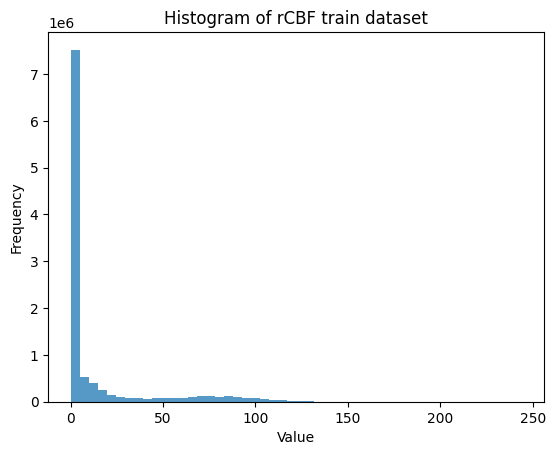

In [ ]:
%matplotlib inline

print('min_value', np.min(train_data_rCBF))
print('max_value' , np.max(train_data_rCBF))

non_zero_count = np.count_nonzero(train_data_rCBF)

print(f'Number of non-zero elements in the array: {non_zero_count}',
      'percent:', non_zero_count / (64*64*64*40) )

# Flatten the 3D numpy array to 1D
data_flattened = train_data_rCBF.flatten()

# Plot histogram
plt.hist(data_flattened, bins=50, alpha=0.75)
plt.title('Histogram of rCBF train dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


min_value 0.0
max_value 847.0
Number of non-zero elements in the array: 1145092 percent: 0.10920448303222656


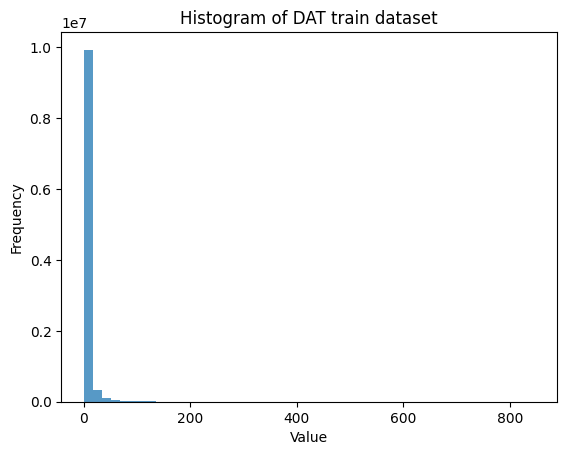

In [ ]:
%matplotlib inline

print('min_value', np.min(train_data_DAT))
print('max_value' , np.max(train_data_DAT))

non_zero_count = np.count_nonzero(train_data_DAT)

print(f'Number of non-zero elements in the array: {non_zero_count}',
      'percent:', non_zero_count / (64*64*64*40) )

# Flatten the 3D numpy array to 1D
data_flattened = train_data_DAT.flatten()

# Plot histogram
plt.hist(data_flattened, bins=50, alpha=0.75)
plt.title('Histogram of DAT train dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


### inspect test dataset, both rCBF and DAT images, their shapes, orientation and see some samples.

In [ ]:
test_rCBF = Path("/content/drive/MyDrive/Assignment/test_images_rcbf.nii")
test_DAT = Path("/content/drive/MyDrive/Assignment/test_images_sbr.nii")

In [ ]:
# Load NIfTI and extract image data
test_PET_rCBF = nib.load(test_rCBF)
test_data_rCBF = test_PET_rCBF.get_fdata()

test_PET__DAT = nib.load(test_DAT)
test_data_DAT = test_PET__DAT.get_fdata()

In [ ]:
print(nib.aff2axcodes(test_PET_rCBF.affine))
print(test_data_rCBF.shape)
print(nib.aff2axcodes(test_PET__DAT.affine))
print(test_data_DAT.shape)

('L', 'A', 'S')
(64, 64, 64, 41)
('L', 'A', 'S')
(64, 64, 64, 41)


In [ ]:
# sample = test_data_rCBF[:,:,:,10]
sample = test_data_DAT[:,:,:,10]

fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(sample.shape[2]):  # Axial view
    plt.imshow(sample[:,:,i], cmap="bone")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation

<IPython.core.display.Javascript object>

sample data from rCBF test images

In [ ]:
HTML(animation.to_html5_video())

sample data from DAT test images of the same subject

In [ ]:
HTML(animation.to_html5_video())

min_value 0.0
max_value 769.0
Number of non-zero elements in the array: 3805584 percent: 0.3540768507050305


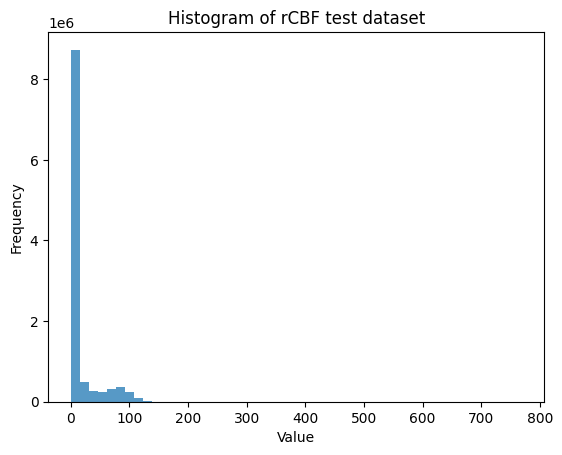

In [ ]:
%matplotlib inline

print('min_value', np.min(test_data_rCBF))
print('max_value' , np.max(test_data_rCBF))

non_zero_count = np.count_nonzero(test_data_rCBF)

print(f'Number of non-zero elements in the array: {non_zero_count}',
      'percent:', non_zero_count / (64*64*64*41) )

# Flatten the 3D numpy array to 1D
data_flattened = test_data_rCBF.flatten()

# Plot histogram
plt.hist(data_flattened, bins=50, alpha=0.75)
plt.title('Histogram of rCBF test dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


min_value 0.0
max_value 826.0
Number of non-zero elements in the array: 1139140 percent: 0.10598717666253811


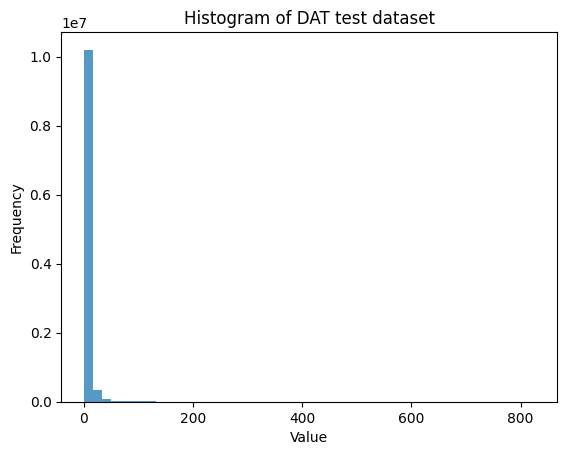

In [ ]:
%matplotlib inline

print('min_value', np.min(test_data_DAT))
print('max_value' , np.max(test_data_DAT))

non_zero_count = np.count_nonzero(test_data_DAT)

print(f'Number of non-zero elements in the array: {non_zero_count}',
      'percent:', non_zero_count / (64*64*64*41) )

# Flatten the 3D numpy array to 1D
data_flattened = test_data_DAT.flatten()

# Plot histogram
plt.hist(data_flattened, bins=50, alpha=0.75)
plt.title('Histogram of DAT test dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


### inspect VOI template

In [ ]:
voi_template = Path("/content/drive/MyDrive/Assignment/voi_template.nii")

In [ ]:
voi = nib.load(voi_template)
data_voi = voi.get_fdata()

In [ ]:
print(nib.aff2axcodes(voi.affine))
print(data_voi.shape)

('L', 'A', 'S')
(64, 64, 64)


In [ ]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(data_voi.shape[2]):  # Axial view
    plt.imshow(data_voi[:,:,i], cmap="bone")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation

<IPython.core.display.Javascript object>

In [ ]:
HTML(animation.to_html5_video())

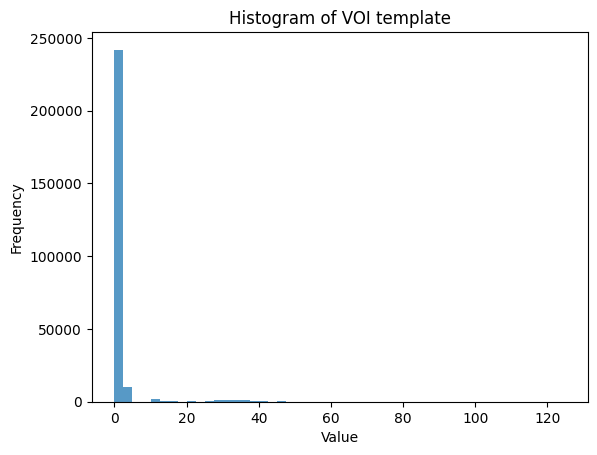

In [ ]:
%matplotlib inline


# Flatten the 3D numpy array to 1D
data_flattened = data_voi.flatten()

# Plot histogram
plt.hist(data_flattened, bins=50, alpha=0.75)
plt.title('Histogram of VOI template')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


In [ ]:
# Get the unique values and their counts
unique_values, counts = np.unique(data_voi, return_counts=True)

print('number of structures: ', len(unique_values)-1,"\n")

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")



number of structures:  53 

0.0 occurs 231434 times
1.0 occurs 5520 times
2.0 occurs 4871 times
3.0 occurs 10169 times
10.0 occurs 877 times
11.0 occurs 868 times
12.0 occurs 188 times
13.0 occurs 185 times
14.0 occurs 404 times
15.0 occurs 381 times
16.0 occurs 69 times
17.0 occurs 58 times
18.0 occurs 50 times
19.0 occurs 60 times
20.0 occurs 140 times
21.0 occurs 143 times
22.0 occurs 1 times
23.0 occurs 2 times
24.0 occurs 2 times
25.0 occurs 1 times
26.0 occurs 357 times
27.0 occurs 374 times
28.0 occurs 665 times
29.0 occurs 656 times
30.0 occurs 455 times
31.0 occurs 464 times
32.0 occurs 385 times
33.0 occurs 385 times
34.0 occurs 527 times
35.0 occurs 505 times
36.0 occurs 5 times
37.0 occurs 344 times
38.0 occurs 354 times
39.0 occurs 50 times
40.0 occurs 40 times
41.0 occurs 191 times
42.0 occurs 214 times
44.0 occurs 139 times
45.0 occurs 122 times
46.0 occurs 29 times
47.0 occurs 32 times
48.0 occurs 54 times
49.0 occurs 53 times
50.0 occurs 15 times
51.0 occurs 16 times
5

In [ ]:
from matplotlib import animation, rc


rc('animation', html='jshtml')


def create_animation(array, case, alpha=0.3, thresh=0.4):
    """Create an animation of a volume"""
    array = np.transpose(array, (2, 0, 1))
    fig = plt.figure(figsize=(4, 4))
    images = []
    for idx, image in enumerate(array):
        # plot image without notifying animation
        image_plot = plt.imshow(image, animated=True, cmap='bone')
        aux = [image_plot]
        images.append(aux)

    plt.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.title(f'Patient ID: {case}', fontsize=16)
    ani = animation.ArtistAnimation(
        fig, images, interval=5000//len(array), blit=False, repeat_delay=1000)
    plt.close()
    return ani

In [ ]:
create_animation(data_voi[:, :, :], 'Test')